In [1]:
import numpy as np
import pandas as pd
import soccerdata as sd
import matplotlib.pyplot as plt
import scipy.stats as stats
from PIL import Image
import urllib

[08/31/23 10:45:05] INFO     No custom team name replacements found. You can configure these in       ]8;id=425048;file://C:\Users\HanifFurqonHidayat\anaconda3\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=926720;file://C:\Users\HanifFurqonHidayat\anaconda3\lib\site-packages\soccerdata\_config.py#84\84]8;;\
                             C:\Users\HanifFurqonHidayat\soccerdata\config\teamname_replacements.json              
                             .                                                                                     

                    INFO     Custom league dict loaded from                                          ]8;id=381712;file://C:\Users\HanifFurqonHidayat\anaconda3\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=809205;file://C:\Users\HanifFurqonHidayat\anaconda3\lib\site-packages\soccerdata\_config.py#160\160]8;;\
                             C:\Users\HanifFurqonHidayat\soccerdata\config\league_dict.json.                       

In [2]:
# show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# set up fbref scrapping
fbref = sd.FBref(leagues="ENG-Premier League", seasons=2223, no_cache=True)

[08/31/23 10:45:06] INFO     Saving cached data to C:\Users\HanifFurqonHidayat\soccerdata\data\FBref  ]8;id=168466;file://C:\Users\HanifFurqonHidayat\anaconda3\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=474287;file://C:\Users\HanifFurqonHidayat\anaconda3\lib\site-packages\soccerdata\_common.py#89\89]8;;\

In [4]:
# show players of the season
df_player_season = fbref.read_player_season_stats(stat_type='keeper_adv').reset_index()
df_player_season = df_player_season.fillna(value=0)
df_player_season = df_player_season.loc[(df_player_season['90s']>5)]
df_player_season = df_player_season.loc[(df_player_season['player']!='Robert Sanchez')]
df_player_season

league season             team             player nation pos  \
                                                                               
0   ENG-Premier League   2223          Arsenal     Aaron Ramsdale    ENG  GK   
1   ENG-Premier League   2223      Aston Villa  Emiliano Martínez    ARG  GK   
3   ENG-Premier League   2223      Bournemouth       Mark Travers    IRL  GK   
4   ENG-Premier League   2223      Bournemouth               Neto    BRA  GK   
5   ENG-Premier League   2223        Brentford         David Raya    ESP  GK   
6   ENG-Premier League   2223         Brighton       Jason Steele    ENG  GK   
7   ENG-Premier League   2223         Brighton     Robert Sánchez    ESP  GK   
8   ENG-Premier League   2223          Chelsea      Edouard Mendy    SEN  GK   
9   ENG-Premier League   2223          Chelsea  Kepa Arrizabalaga    ESP  GK   
11  ENG-Premier League   2223   Crystal Palace      Sam Johnstone    ENG  GK   
12  ENG-Premier League   2223   Crystal Palace     Vicente Guaita    ESP  GK   
14  ENG-Premier League   2223          Everton    Jordan Pickford    ENG  GK   
15  ENG-Premier League   2223           Fulham         Bernd Leno    GER  GK   
17  ENG-Premier League   2223     Leeds United      Illan Meslier    FRA  GK   
19  ENG-Premier League   2223   Leicester City     Daniel Iversen    DEN  GK   
20  ENG-Premier League   2223   Leicester City         Danny Ward    WAL  GK   
21  ENG-Premier League   2223        Liverpool            Alisson    BRA  GK   
23  ENG-Premier League   2223  Manchester City            Ederson    BRA  GK   
25  ENG-Premier League   2223   Manchester Utd       David de Gea    ESP  GK   
27  ENG-Premier League   2223    Newcastle Utd          Nick Pope    ENG  GK   
28  ENG-Premier League   2223  Nott'ham Forest     Dean Henderson    ENG  GK   
29  ENG-Premier League   2223  Nott'ham Forest       Keylor Navas    CRC  GK   
31  ENG-Premier League   2223      Southampton      Alex McCarthy    ENG  GK   
32  ENG-Premier League   2223      Southampton       Gavin Bazunu    IRL  GK   
33  ENG-Premier League   2223        Tottenham     Fraser Forster    ENG  GK   
34  ENG-Premier League   2223        Tottenham        Hugo Lloris    FRA  GK   
36  ENG-Premier League   2223         West Ham   Łukasz Fabiański    POL  GK   
38  ENG-Premier League   2223           Wolves            José Sá    POR  GK   

   age  born   90s Goals              Expected                         \
                      GA PKA FK CK OG     PSxG PSxG/SoT PSxG+/-   /90   
0   24  1998  38.0    43   3  0  6  1     40.0     0.28    -2.0 -0.05   
1   29  1992  34.9    38   4  1  6  4     36.6     0.24     2.6  0.07   
3   23  1999  11.5    32   2  0  8  2     24.0     0.34    -6.0 -0.52   
4   33  1989  26.5    39   4  0  8  1     39.7     0.26     1.7  0.06   
5   26  1995  38.0    46   2  0  9  3     48.0     0.24     5.0  0.13   
6   31  1990  15.0    23   1  0  2  3     18.5     0.29    -1.5  -0.1   
7   24  1997  23.0    30   5  0  4  3     24.2     0.25    -2.8 -0.12   
8   30  1992   9.5    14   0  0  4  0     11.9     0.33    -2.1 -0.22   
9   27  1994  28.5    33   1  1  4  3     35.0     0.29     5.0  0.18   
11  29  1993   9.0    10   2  0  4  1     10.0     0.24     1.0  0.11   
12  35  1987  27.0    34   2  0  4  2     32.4     0.26     0.4  0.01   
14  28  1994  37.0    57   5  2  4  0     60.0     0.31     3.0  0.08   
15  30  1992  36.0    51   7  1  8  2     58.0     0.27     9.0  0.25   
17  22  2000  34.0    67   3  1  7  1     53.6     0.32   -12.4 -0.36   
19  25  1997  12.0    22   2  2  2  1     18.9     0.29    -2.1 -0.18   
20  29  1993  26.0    46   2  2  6  4     36.5     0.29    -5.5 -0.21   
21  29  1992  37.0    43   2  0  0  2     51.1     0.33    10.1  0.27   
23  28  1993  35.0    32   3  1  4  1     26.2      0.3    -4.8 -0.14   
25  31  1990  38.0    43   2  2  6  1     41.3     0.27    -0.7 -0.02   
27  30  1992  36.2    32   2  0  8  1     31.3     0.24     0.3  0.01   
28  25  1

In [5]:
df_player_season['zscore'] = stats.zscore(df_player_season['Launched']['Cmp%'].astype(float))*.5 + stats.zscore(df_player_season['Launched']['Cmp%'].astype(float))*.5
df_player_season['annotated'] = [True if x < df_player_season['zscore'].quantile(.2) else True if x > df_player_season['zscore'].quantile(.8) else False for x in df_player_season['zscore']]

In [6]:
df_player_season

league season             team             player nation pos  \
                                                                               
0   ENG-Premier League   2223          Arsenal     Aaron Ramsdale    ENG  GK   
1   ENG-Premier League   2223      Aston Villa  Emiliano Martínez    ARG  GK   
3   ENG-Premier League   2223      Bournemouth       Mark Travers    IRL  GK   
4   ENG-Premier League   2223      Bournemouth               Neto    BRA  GK   
5   ENG-Premier League   2223        Brentford         David Raya    ESP  GK   
6   ENG-Premier League   2223         Brighton       Jason Steele    ENG  GK   
7   ENG-Premier League   2223         Brighton     Robert Sánchez    ESP  GK   
8   ENG-Premier League   2223          Chelsea      Edouard Mendy    SEN  GK   
9   ENG-Premier League   2223          Chelsea  Kepa Arrizabalaga    ESP  GK   
11  ENG-Premier League   2223   Crystal Palace      Sam Johnstone    ENG  GK   
12  ENG-Premier League   2223   Crystal Palace     Vicente Guaita    ESP  GK   
14  ENG-Premier League   2223          Everton    Jordan Pickford    ENG  GK   
15  ENG-Premier League   2223           Fulham         Bernd Leno    GER  GK   
17  ENG-Premier League   2223     Leeds United      Illan Meslier    FRA  GK   
19  ENG-Premier League   2223   Leicester City     Daniel Iversen    DEN  GK   
20  ENG-Premier League   2223   Leicester City         Danny Ward    WAL  GK   
21  ENG-Premier League   2223        Liverpool            Alisson    BRA  GK   
23  ENG-Premier League   2223  Manchester City            Ederson    BRA  GK   
25  ENG-Premier League   2223   Manchester Utd       David de Gea    ESP  GK   
27  ENG-Premier League   2223    Newcastle Utd          Nick Pope    ENG  GK   
28  ENG-Premier League   2223  Nott'ham Forest     Dean Henderson    ENG  GK   
29  ENG-Premier League   2223  Nott'ham Forest       Keylor Navas    CRC  GK   
31  ENG-Premier League   2223      Southampton      Alex McCarthy    ENG  GK   
32  ENG-Premier League   2223      Southampton       Gavin Bazunu    IRL  GK   
33  ENG-Premier League   2223        Tottenham     Fraser Forster    ENG  GK   
34  ENG-Premier League   2223        Tottenham        Hugo Lloris    FRA  GK   
36  ENG-Premier League   2223         West Ham   Łukasz Fabiański    POL  GK   
38  ENG-Premier League   2223           Wolves            José Sá    POR  GK   

   age  born   90s Goals              Expected                         \
                      GA PKA FK CK OG     PSxG PSxG/SoT PSxG+/-   /90   
0   24  1998  38.0    43   3  0  6  1     40.0     0.28    -2.0 -0.05   
1   29  1992  34.9    38   4  1  6  4     36.6     0.24     2.6  0.07   
3   23  1999  11.5    32   2  0  8  2     24.0     0.34    -6.0 -0.52   
4   33  1989  26.5    39   4  0  8  1     39.7     0.26     1.7  0.06   
5   26  1995  38.0    46   2  0  9  3     48.0     0.24     5.0  0.13   
6   31  1990  15.0    23   1  0  2  3     18.5     0.29    -1.5  -0.1   
7   24  1997  23.0    30   5  0  4  3     24.2     0.25    -2.8 -0.12   
8   30  1992   9.5    14   0  0  4  0     11.9     0.33    -2.1 -0.22   
9   27  1994  28.5    33   1  1  4  3     35.0     0.29     5.0  0.18   
11  29  1993   9.0    10   2  0  4  1     10.0     0.24     1.0  0.11   
12  35  1987  27.0    34   2  0  4  2     32.4     0.26     0.4  0.01   
14  28  1994  37.0    57   5  2  4  0     60.0     0.31     3.0  0.08   
15  30  1992  36.0    51   7  1  8  2     58.0     0.27     9.0  0.25   
17  22  2000  34.0    67   3  1  7  1     53.6     0.32   -12.4 -0.36   
19  25  1997  12.0    22   2  2  2  1     18.9     0.29    -2.1 -0.18   
20  29  1993  26.0    46   2  2  6  4     36.5     0.29    -5.5 -0.21   
21  29  1992  37.0    43   2  0  0  2     51.1     0.33    10.1  0.27   
23  28  1993  35.0    32   3  1  4  1     26.2      0.3    -4.8 -0.14   
25  31  1990  38.0    43   2  2  6  1     41.3     0.27    -0.7 -0.02   
27  30  1992  36.2    32   2  0  8  1     31.3     0.24     0.3  0.01   
28  25  1

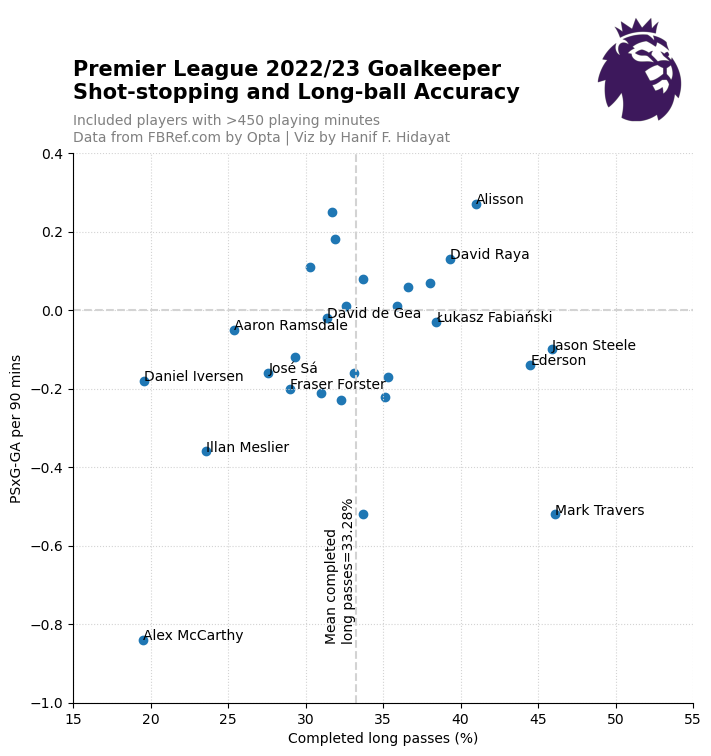

In [7]:
fig = plt.figure(figsize=(8,9))
ax = fig.subplot_mosaic([['title']*4 + ['logo'],
                         ['main']*5,
                         ['main']*5,
                         ['main']*5,
                         ['main']*5])

xlim = plt.xlim(15, 55)
ylim = plt.ylim(-1, 0.4)

xlabel = plt.xlabel("Completed long passes (%)")
ylabel = plt.ylabel("PSxG-GA per 90 mins")

ax['title'].axis('off')

ax['title'].text(x=0, y=0.4, 
                 s='Premier League 2022/23 Goalkeeper \nShot-stopping and Long-ball Accuracy', 
                 ha='left', 
                 va='center',
                 weight='bold', 
                 size=15)

ax['title'].text(x=0, y=0, 
                 s='Included players with >450 playing minutes \nData from FBRef.com by Opta | Viz by Hanif F. Hidayat', 
                 ha='left', 
                 va='center',
                 size=10,
                 color='grey')

ax['logo'].axis('off')

logo = Image.open(r"Logos\premier-league.png")

ax['logo'].imshow(logo)

ax['main'].spines["top"].set_visible(False)
ax['main'].spines["right"].set_visible(False)
ax['main'].grid(visible = True, ls = ":", color = "lightgray")

ax['main'].scatter(df_player_season['Launched']['Cmp%'], df_player_season['Expected']['/90'])

ax['main'].axvline(x=df_player_season['Launched']['Cmp%'].mean(), linestyle='dashed', color='lightgrey')

ax['main'].text(x=df_player_season['Launched']['Cmp%'].mean()-2, y=-0.85,
                s='Mean completed \nlong passes={:.2f}%'.format(df_player_season['Launched']['Cmp%'].mean()),
                va='bottom',
                rotation='vertical')

ax['main'].axhline(y=0, linestyle='dashed', color='lightgrey')

for i in df_player_season.loc[(df_player_season['annotated']==True)].index:
    ax['main'].annotate(xy=(df_player_season['Launched']['Cmp%'][i], df_player_season['Expected']['/90'][i]),
                        text=df_player_season['player'][i])
    
ax['main'].text(x=df_player_season.loc[(df_player_season['player']=='David de Gea')]['Launched']['Cmp%'], 
                y=df_player_season.loc[(df_player_season['player']=='David de Gea')]['Expected']['/90'],
                s='David de Gea')

plt.savefig(r"Plot\FBRef.png",
            facecolor='#FFFFFF',
            edgecolor='none',
            bbox_inches='tight', 
            dpi=600,
            transparent=False)

In [8]:
'Mean completed long passes = {}'.format(df_player_season['Launched']['Cmp%'].mean())

'Mean completed long passes = 33.278571428571425'